In [1]:
import torch
import numpy as np
import pandas as pd
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T 
ITERATION = 8

In [2]:
sphere = torch.load("./retrosynthesis/sphere/optim_traj.pkl", map_location=torch.device('cpu'))
triangle = torch.load("./retrosynthesis/triangle/optim_traj.pkl", map_location=torch.device('cpu'))

In [3]:
comps_sphere = sphere["X_traj"][:,-1,:]
comps_triangle = triangle["X_traj"][:,-1,:]
optim_comps = torch.cat((comps_sphere, comps_triangle), dim=0).numpy()
print(optim_comps)

[[26.88539568  3.29252038]
 [87.          6.28802505]
 [48.85836135  0.16771025]
 [ 9.74267124 10.13039093]
 [17.21250166  0.54694943]
 [61.7869744   7.38185416]
 [74.59934684  4.3870422 ]
 [28.23896641  8.40054855]
 [62.59659265  1.37712874]
 [14.12523416  5.18845037]
 [29.81075532  4.57630546]
 [61.18446434 11.        ]
 [85.75277678  3.7679272 ]
 [36.6983922   7.36719774]
 [ 3.13349753  0.        ]
 [43.30653345  8.08631021]]


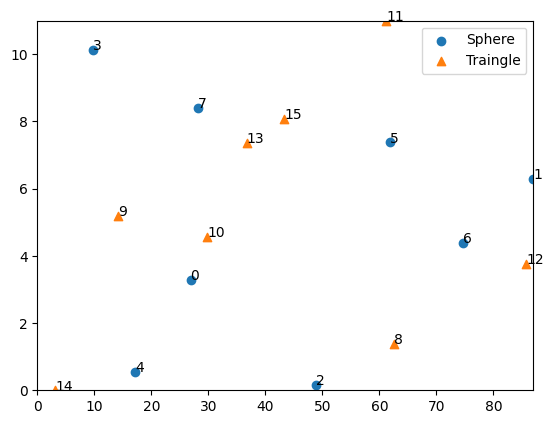

In [8]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.scatter(comps_sphere[:,0], comps_sphere[:,1], marker="o", label="Sphere")
ax.scatter(comps_triangle[:,0], comps_triangle[:,1], marker="^",label="Traingle")
for i in range(optim_comps.shape[0]):
    ax.text(optim_comps[i,0], optim_comps[i,1], i)
ax.set_xlim([bounds[0,0], bounds[1,0]])
ax.set_ylim([bounds[0,1], bounds[1,1]])
ax.legend()
plt.show()


Take SEM images of [3, 4, 2, 5] for sphere and [9, 15, 10, 12] for triangle 
this would be [A3, A4, A5, A6, B2, B3, B5, B8]

In [31]:
volumes = optim_comps[:,0]
times = optim_comps[:,1]
n_samples = len(optim_comps)

In [32]:
Z2 = np.round(volumes.reshape(-1,1)).astype(int)
Hepes = np.array([54]*n_samples).reshape(-1,1)
Z2M246I = np.array([87]*n_samples).reshape(-1,1)
Au = np.array([13]*n_samples).reshape(-1,1)
array = np.hstack((Hepes, Z2M246I, Au, Z2))
water = 280 - np.sum(array, axis=1).reshape(-1,1)
volume_array = np.hstack((water, array))
volume_df = pd.DataFrame(volume_array, columns=['Water', 'HEPES', 'Z2M246I', 'Au', 'Z2'])
volume_df

,Water,HEPES,Z2M246I,Au,Z2
0,99,54,87,13,27
1,39,54,87,13,87
2,77,54,87,13,49
3,116,54,87,13,10
4,109,54,87,13,17
5,64,54,87,13,62
6,51,54,87,13,75
7,98,54,87,13,28
8,63,54,87,13,63
9,112,54,87,13,14


In [33]:
DT1 = np.array([0]*n_samples).reshape(-1,1)
DT2 = np.array([0]*n_samples).reshape(-1,1)
DT3 = np.array([0]*n_samples).reshape(-1,1)
DT4 = np.round(times.reshape(-1,1)).astype(int)
time_array = np.hstack((DT1, DT2, DT3, DT4))
time_df = pd.DataFrame(time_array, columns=['DT1', 'DT2', 'DT3', 'DT4'])
time_df

,DT1,DT2,DT3,DT4
0,0,0,0,3
1,0,0,0,6
2,0,0,0,0
3,0,0,0,10
4,0,0,0,1
5,0,0,0,7
6,0,0,0,4
7,0,0,0,8
8,0,0,0,1
9,0,0,0,5


In [34]:
volume_df.to_csv('./opentrons/volumes_%d.csv'%(ITERATION),index=False)
time_df.to_csv('./opentrons/times_%d.csv'%(ITERATION),index=False)